<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
def three_metrics(y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print("Mean Squared Error: " + str(mse))
  print("Mean Absolute Error: " + str(mae))
  print("r2 score: " + str(r2))

In [28]:
#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)
  #AI helped write this code

  def categorize_cpu(cpu_model):
      if isinstance(cpu_model, str):
          cpu_model_lower = cpu_model.lower()
          if 'core i7' in cpu_model_lower:
              return 'Core i7'
          elif 'core i5' in cpu_model_lower:
              return 'Core i5'
          elif 'core i3' in cpu_model_lower:
              return 'Core i3'
          elif 'ryzen' in cpu_model_lower:
              return 'Ryzen'
          elif 'celeron' in cpu_model_lower:
              return 'Celeron'
          elif 'atom' in cpu_model_lower:
              return 'Atom'
          elif 'xeon' in cpu_model_lower:
              return 'Xeon'
          elif 'a' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'A-Series'
          elif 'e' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'E-Series'
          elif 'fx' in cpu_model_lower:
              return 'FX-Series'
          elif 'pentium' in cpu_model_lower:
              return 'Pentium'
          elif 'core m' in cpu_model_lower:
              return 'Core M'
          elif 'cortex' in cpu_model_lower:
              return 'Cortex'
          else:
              return 'Other'
      return 'Unknown'

  laptop['CPU_categories'] = laptop['CPU_model'].apply(categorize_cpu)

  def categorize_gpu(gpu_model):
      if isinstance(gpu_model, str):
          gpu_model_lower = gpu_model.lower()
          if 'geforce gtx' in gpu_model_lower:
              return 'Nvidia GeForce GTX'
          elif 'geforce mx' in gpu_model_lower:
              return 'Nvidia GeForce MX'
          elif 'geforce' in gpu_model_lower:
              return 'Nvidia GeForce'
          elif 'quadro' in gpu_model_lower:
              return 'Nvidia Quadro'
          elif 'nvidia' in gpu_model_lower:
              return 'Nvidia (Other)'
          elif 'radeon pro' in gpu_model_lower:
              return 'AMD Radeon Pro'
          elif 'radeon' in gpu_model_lower:
              return 'AMD Radeon'
          elif 'amd' in gpu_model_lower:
              return 'AMD (Other)'
          elif 'iris plus graphics' in gpu_model_lower:
              return 'Intel Iris Plus'
          elif 'hd graphics' in gpu_model_lower:
              return 'Intel HD Graphics'
          elif 'intel' in gpu_model_lower or 'graphics' in gpu_model_lower:
              return 'Intel (Other)'
          else:
              return 'Other'
      return 'Unknown'

  laptop['GPU_categories'] = laptop['GPU_model'].apply(categorize_gpu)

  #No more AI after this

  improved_laptop=laptop.drop(['CPU_model','GPU_model'],axis=1)
  improved_laptop=improved_laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company'],axis=1)

  improved_laptop = pd.get_dummies(improved_laptop, columns=['CPU_categories','GPU_categories', 'Touchscreen', 'PrimaryStorageType','SecondaryStorageType',
                                                           'Screen', 'RetinaDisplay','IPSpanel'], drop_first=True, dtype=int)

  improved_laptop_noscale = improved_laptop
  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)


  improved_laptop_onehot = improved_laptop_features.drop(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],axis=1)
  improved_laptop_continous = improved_laptop_features[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]

  scaler = StandardScaler()
  price_scaler = StandardScaler()

  improved_laptop_continous_scaled = scaler.fit_transform(improved_laptop_continous)
  laptop_prices_scaled = price_scaler.fit_transform(laptop_prices)

  improved_laptop_continous = pd.DataFrame(improved_laptop_continous_scaled, columns= improved_laptop_continous.columns)
  laptop_prices = pd.DataFrame(laptop_prices_scaled, columns= laptop_prices.columns)

  improved_laptop = pd.concat([improved_laptop_continous, improved_laptop_onehot], axis=1)

  improved_laptop_wprice = pd.concat([laptop_prices, improved_laptop], axis=1)

  X, y = improved_laptop.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale)

In [29]:
X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale = get_data()

In [44]:
display(improved_laptop_noscale[improved_laptop_noscale['Price_euros'] >3000])

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,CPU_categories_Atom,...,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,RetinaDisplay_Yes,IPSpanel_Yes
196,17.3,32,3.49,6099.00,3840,2160,2.9,1024,0,0,...,0,1,0,1,0,0,0,0,0,0
204,15.6,16,2.80,3055.00,3840,2160,3.0,256,1024,0,...,0,1,0,0,0,0,0,0,0,0
238,17.3,32,4.70,3890.00,1920,1080,2.9,512,1024,0,...,0,1,0,0,0,1,0,0,0,0
530,17.3,16,4.42,3012.77,1920,1080,2.8,128,1024,0,...,0,1,0,0,0,1,0,0,0,1
610,15.6,32,2.50,4899.00,3840,2160,3.1,1024,0,0,...,0,1,0,1,0,0,0,0,0,1
659,17.3,32,4.42,3147.37,3840,2160,2.8,512,1024,0,...,0,1,0,0,0,0,0,0,0,1
723,17.3,32,4.36,3659.40,3840,2160,2.8,1024,1024,0,...,0,1,0,0,0,0,0,0,0,0
744,15.6,16,2.50,3299.00,3840,2160,2.8,1024,0,0,...,0,1,0,1,0,0,0,0,0,1
749,17.3,16,3.00,4389.00,1920,1080,2.9,256,0,0,...,0,1,0,1,0,1,0,0,0,1
780,17.3,32,4.42,3588.80,1920,1080,2.8,1024,1024,0,...,0,1,0,0,0,1,0,0,0,1


# Outlier finding

In [31]:
columns=improved_laptop_continous.columns
improved_laptop_continous = scaler.inverse_transform(improved_laptop_continous)
improved_laptop_continous = pd.DataFrame(improved_laptop_continous, columns=columns )

<Axes: >

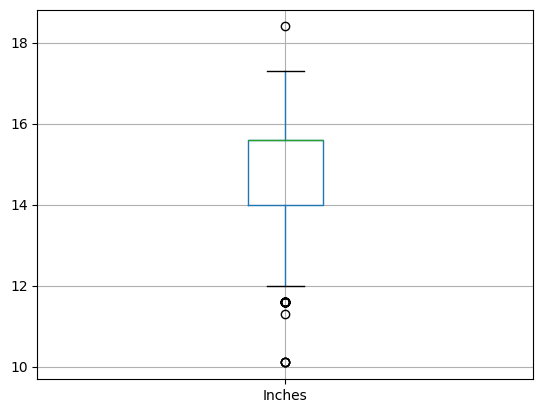

In [32]:
improved_laptop_continous.boxplot(column='Inches')

<Axes: >

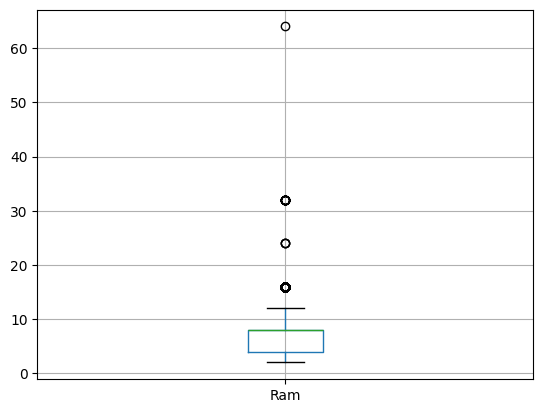

In [33]:
improved_laptop_continous.boxplot(column='Ram')

<Axes: >

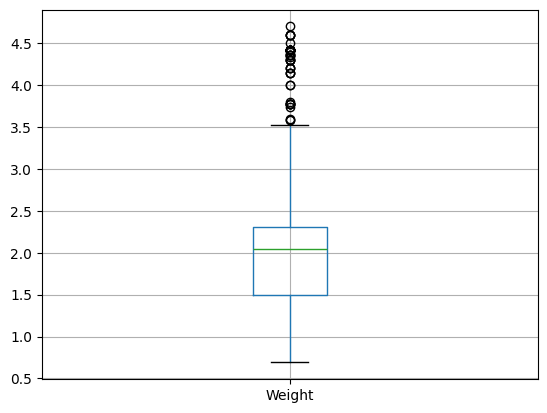

In [34]:
improved_laptop_continous.boxplot(column='Weight')

<Axes: >

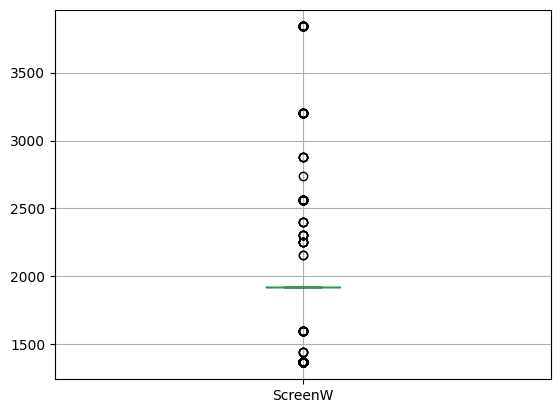

In [35]:
improved_laptop_continous.boxplot(column='ScreenW')

<Axes: >

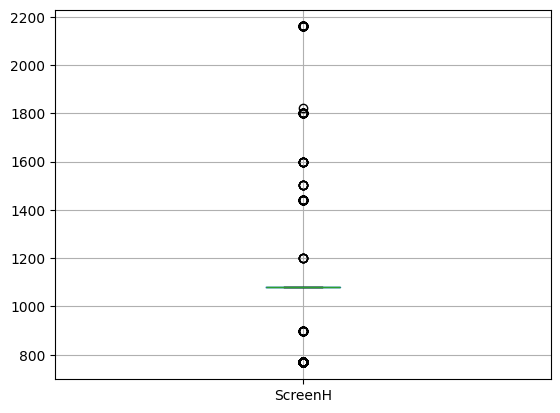

In [36]:
improved_laptop_continous.boxplot(column='ScreenH')

# model training

In [37]:
lin_reg_l1 = LassoCV(cv=5, random_state=0)
lin_reg_l1.fit(X_train, y_train)

pred = lin_reg_l1.predict(X_test)

print("\n")

three_metrics(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Mean Squared Error: 162896.66031212444
Mean Absolute Error: 275.5523792108501
r2 score: 0.7386517032682596


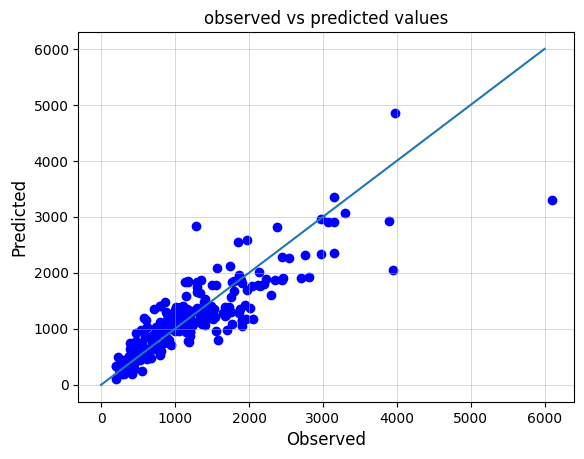

In [38]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)) , color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)

ridge and standard model

In [39]:
lin_reg_l2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 15, 20, 25, 50, 100])
lin_reg_l2.fit(X_train, y_train)

pred = lin_reg_l2.predict(X_test)

three_metrics(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)))

Mean Squared Error: 161762.686067735
Mean Absolute Error: 272.53769969876595
r2 score: 0.7404710299305803


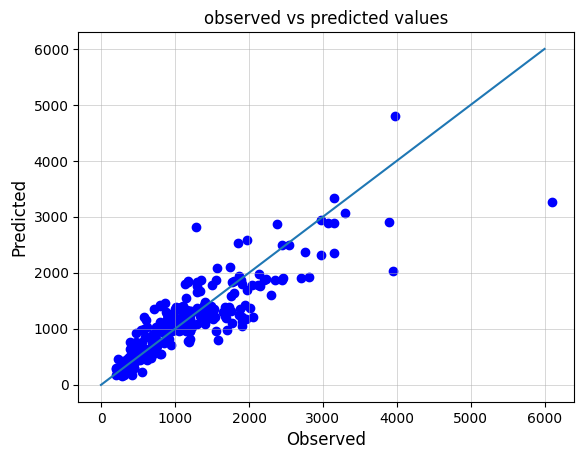

In [40]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)) , color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

three_metrics(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)))

Mean Squared Error: 164987.74054468577
Mean Absolute Error: 276.39492319927086
r2 score: 0.7352968140024996


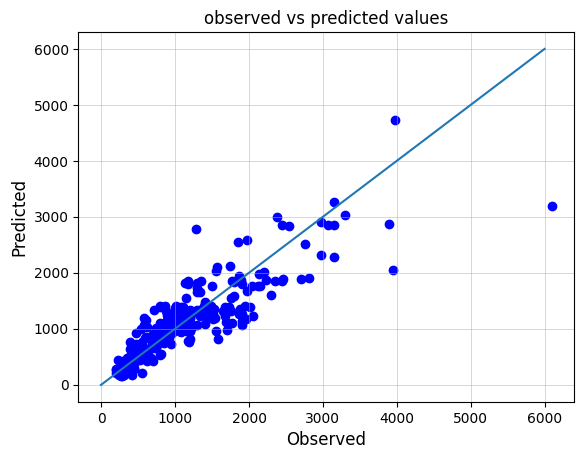

In [42]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(pred.reshape(-1,1)) , color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)